# **BLOQUE 1: CONFIGURACIÓN E IMPORTACIÓN DE LIBRERIAS:**

In [1]:
# --- BLOQUE 1: CONFIGURACIÓN E IMPORTACIÓN ---
from google.colab import drive
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos (le da un toque más profesional)
sns.set_theme(style="whitegrid", palette="muted")

# Montamos Drive
drive.mount('/content/drive')

# --- CONSTANTES DEL PROYECTO ---
# Definimos aquí las variables clave para facilitar cambios futuros
AGLOMERADOS_INTERES = [34, 12]  # 34: Mar del Plata, 12: Corrientes
RUTA_CARPETA_EPH = '/content/drive/MyDrive/ColabNotebooks/Trimestres_anio_archivoTxt'
RUTA_ARCHIVO_IPC = '/content/drive/MyDrive/ColabNotebooks/sh_ipc_aperturas.xlsx'

print("✅ Entorno configurado correctamente.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Entorno configurado correctamente.


# **BLOQUE 2: CARGA DE DATOS EPH**

In [2]:
# --- BLOQUE 2: CARGA DE DATOS EPH ---

def cargar_bases_eph(ruta_carpeta, aglomerados_filtro):
    """
    Recorre la carpeta especificada, carga los archivos .txt y concatena
    solo los registros que coinciden con los aglomerados solicitados.
    """
    lista_dfs = []

    # Verificamos que la ruta exista
    if not os.path.exists(ruta_carpeta):
        print(f"❌ Error: No se encuentra la ruta {ruta_carpeta}")
        return None

    archivos = [f for f in os.listdir(ruta_carpeta) if f.lower().endswith('.txt')]
    print(f"📂 Se encontraron {len(archivos)} archivos de bases EPH.")

    columnas_clave = ['ano4', 'trimestre', 'aglomerado', 'estado', 'pondera', 'p21', 'pp3e_tot', 'ch04', 'ch06', 'nived']

    for archivo in archivos:
        ruta_completa = os.path.join(ruta_carpeta, archivo)
        try:
            # Leemos el archivo (el separador suele ser ; o , dependiendo del año)
            # Probamos primero con ;
            df_temp = pd.read_csv(ruta_completa, sep=';', encoding='latin-1', low_memory=False)

            # Estandarizamos columnas a minúsculas para evitar errores (ANO4 vs ano4)
            df_temp.columns = df_temp.columns.str.lower()

            # Si falló el separador y cargó todo en una columna, reintentamos con coma
            if df_temp.shape[1] < 5:
                 df_temp = pd.read_csv(ruta_completa, sep=',', encoding='latin-1', low_memory=False)
                 df_temp.columns = df_temp.columns.str.lower()

            # FILTRO 1: Solo los aglomerados que nos interesan (ahorra memoria)
            # Convertimos a numérico para asegurar coincidencia
            df_temp['aglomerado'] = pd.to_numeric(df_temp['aglomerado'], errors='coerce')
            df_filtrado = df_temp[df_temp['aglomerado'].isin(aglomerados_filtro)].copy()

            if not df_filtrado.empty:
                # Creamos la columna PERIODO para series de tiempo
                df_filtrado['periodo'] = df_filtrado['ano4'].astype(str) + 'Q' + df_filtrado['trimestre'].astype(str)
                lista_dfs.append(df_filtrado)
                print(f"  -> Cargado: {archivo} ({len(df_filtrado)} registros de interés)")

        except Exception as e:
            print(f"⚠️ Advertencia: No se pudo leer {archivo}. Error: {e}")

    if lista_dfs:
        base_final = pd.concat(lista_dfs, ignore_index=True)
        print("-" * 50)
        print(f"✅ Carga completa. Total de registros acumulados: {len(base_final)}")
        return base_final
    else:
        print("❌ No se pudieron cargar datos.")
        return None

# Ejecutamos la función
base_eph = cargar_bases_eph(RUTA_CARPETA_EPH, AGLOMERADOS_INTERES)

# Vistazo rápido
if base_eph is not None:
    display(base_eph.head())
    print("Aglomerados cargados:", base_eph['aglomerado'].unique())

📂 Se encontraron 37 archivos de bases EPH.
  -> Cargado: usu_individual_T216.txt (2855 registros de interés)
  -> Cargado: usu_Individual_T220.txt (1897 registros de interés)
  -> Cargado: usu_individual_T221.txt (2317 registros de interés)
  -> Cargado: usu_individual_T223.txt (2139 registros de interés)
  -> Cargado: usu_individual_T224.txt (2012 registros de interés)
  -> Cargado: usu_individual_T225.txt (1915 registros de interés)
  -> Cargado: usu_individual_T222.txt (2176 registros de interés)
  -> Cargado: usu_individual_T217.txt (2638 registros de interés)
  -> Cargado: usu_individual_T218.txt (2598 registros de interés)
  -> Cargado: usu_individual_T219.txt (2785 registros de interés)
  -> Cargado: usu_individual_t416.txt (2805 registros de interés)
  -> Cargado: usu_individual_T424.txt (1956 registros de interés)
  -> Cargado: usu_individual_T423.txt (2025 registros de interés)
  -> Cargado: usu_individual_T421.txt (2235 registros de interés)
  -> Cargado: usu_individual_T419

,codusu,ano4,trimestre,nro_hogar,componente,h15,region,mas_500,aglomerado,pondera,...,v22_01_m,v22_02_m,v22_03_m,p_deccf,p_rdeccf,p_gdeccf,p_pdeccf,p_ideccf,p_adeccf,unnamed: 177
0,TQRMNORPVHLMKQCDEIKAH00485668,2016,2,1,3,1,43,S,34,522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TQRMNORPVHLMKQCDEIKAH00485668,2016,2,1,4,1,43,S,34,522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TQRMNOQYQHLMKUCDEIKAH00485679,2016,2,1,1,1,43,S,34,500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TQRMNOQYQHLMKUCDEIKAH00485679,2016,2,1,2,1,43,S,34,500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TQRMNOQVWHKOLPCDEIKAH00485617,2016,2,1,1,1,43,S,34,498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aglomerados cargados: [34 12]


# **BLOQUE 3: PREPARACIÓN DE DATOS DE INFLACIÓN (IPC)**

In [12]:
# --- BLOQUE 3: PREPARACIÓN DE LA SERIE DE INFLACIÓN (IPC) ---

def procesar_ipc_para_ajuste(ruta_archivo_ipc):
    print(f"📉 Cargando datos de inflación desde: {ruta_archivo_ipc}")

    try:
        # Leemos el Excel.
        df_raw = pd.read_excel(ruta_archivo_ipc, sheet_name='Índices aperturas', header=5)

        # 1. Filtramos las columnas de fecha
        cols_fechas = [c for c in df_raw.columns if str(c).startswith('20')]

        # 2. Transformación "Melt" (De ancho a largo)
        df_long = df_raw.melt(
            id_vars=[df_raw.columns[0]],
            value_vars=cols_fechas,
            var_name='fecha_mensual',
            value_name='indice_ipc'
        )

        # --- CORRECCIÓN CLAVE: FORZAR A NUMÉRICO ---
        # Esto elimina cualquier texto o espacio que esté causando el error "dtype->object"
        df_long['indice_ipc'] = pd.to_numeric(df_long['indice_ipc'], errors='coerce')

        # 3. Conversión de fechas y creación del PERIODO
        df_long['fecha_mensual'] = pd.to_datetime(df_long['fecha_mensual'], errors='coerce')

        # Formato trimestral: 2023Q1
        df_long['periodo'] = (
            df_long['fecha_mensual'].dt.year.astype(str) + 'Q' +
            df_long['fecha_mensual'].dt.quarter.astype(str)
        )

        # 4. Agrupar por trimestre (Promedio)
        # Ahora que es numérico, el .mean() funcionará perfecto
        ipc_trimestral = df_long.groupby('periodo')['indice_ipc'].mean().reset_index()

        # --- CÁLCULO DEL FACTOR DE AJUSTE ---
        # Tomamos el último valor válido como base
        ipc_actual = ipc_trimestral['indice_ipc'].iloc[-1]
        ipc_trimestral['factor_ajuste'] = ipc_actual / ipc_trimestral['indice_ipc']

        print("✅ Serie de inflación procesada exitosamente.")
        return ipc_trimestral

    except Exception as e:
        print(f"❌ Error procesando el IPC: {e}")
        return None

# Ejecutamos la función
df_ipc_final = procesar_ipc_para_ajuste(RUTA_ARCHIVO_IPC)

if df_ipc_final is not None:
    print("Últimos 5 trimestres calculados:")
    display(df_ipc_final.tail())

📉 Cargando datos de inflación desde: /content/drive/MyDrive/ColabNotebooks/sh_ipc_aperturas.xlsx
✅ Serie de inflación procesada exitosamente.
Últimos 5 trimestres calculados:


,periodo,indice_ipc,factor_ajuste
32,2024Q4,7412.805091,1.283193
33,2025Q1,7979.983807,1.191990
34,2025Q2,8569.204352,1.110029
35,2025Q3,9072.170274,1.048488
36,2025Q4,9512.061855,1.000000


# **BLOQUE 4: UNIFICACIÓN DE DATOS E INGRESO REAL**

In [13]:
# --- BLOQUE 4: UNIFICACIÓN DE BASES Y CÁLCULO DE INGRESOS ---

if 'base_eph' in globals() and df_ipc_final is not None:
    print("🔄 Unificando EPH con datos de Inflación...")

    # Trabajamos sobre una copia para no romper la carga original
    df_trabajo = base_eph.copy()

    # 1. Conversión de columnas clave a números (Manejo de errores 'NaN')
    # P21: Ingreso de la ocupación principal
    # PP3E_TOT: Total de horas trabajadas en la semana
    cols_a_convertir = ['p21', 'pp3e_tot']
    for col in cols_a_convertir:
        df_trabajo[col] = pd.to_numeric(df_trabajo[col], errors='coerce')

    # 2. Cruce (Merge) con la tabla de inflación
    # Usamos 'periodo' como llave. 'left' mantiene todas las filas de la EPH.
    df_trabajo = df_trabajo.merge(
        df_ipc_final[['periodo', 'factor_ajuste']],
        on='periodo',
        how='left'
    )

    # 3. Cálculo de Ingreso Horario Nominal
    # Usamos np.where para evitar la división por cero si alguien trabajó 0 horas
    df_trabajo['ingreso_horario_nominal'] = np.where(
        df_trabajo['pp3e_tot'] > 0,
        df_trabajo['p21'] / df_trabajo['pp3e_tot'],
        np.nan
    )

    # 4. Cálculo de Ingreso Horario REAL (Ajustado a valor hoy)
    df_trabajo['ingreso_horario_real'] = df_trabajo['ingreso_horario_nominal'] * df_trabajo['factor_ajuste']

    print("-" * 50)
    print(f"✅ Base unificada lista. Dimensiones finales: {df_trabajo.shape}")
    print("-" * 50)

    # Verificación visual de los resultados
    print("Muestra de datos (Comparación Nominal vs Real):")
    cols_ver = ['periodo', 'aglomerado', 'p21', 'ingreso_horario_nominal', 'factor_ajuste', 'ingreso_horario_real']
    display(df_trabajo[cols_ver].dropna().head())

else:
    print("⚠️ Faltan cargar las bases anteriores (base_eph o df_ipc_final). Revisa los bloques 1, 2 y 3.")

🔄 Unificando EPH con datos de Inflación...
--------------------------------------------------
✅ Base unificada lista. Dimensiones finales: (87062, 244)
--------------------------------------------------
Muestra de datos (Comparación Nominal vs Real):


,periodo,aglomerado,p21,ingreso_horario_nominal,factor_ajuste,ingreso_horario_real
2856,2020Q2,34,-9.0,-0.200000,29.59724,-5.919448
2858,2020Q2,34,10000.0,277.777778,29.59724,8221.455628
2859,2020Q2,34,36000.0,1800.000000,29.59724,53275.032468
2860,2020Q2,34,-9.0,-0.900000,29.59724,-26.637516
2865,2020Q2,34,40000.0,888.888889,29.59724,26308.658009


# **BLOQUE 5: CÁLCULO DE TASAS DEL MERCADO DE TRABAJO**

In [14]:
# --- BLOQUE 5: CÁLCULO DE TASAS DEL MERCADO DE TRABAJO ---

def calcular_indicadores_laborales(df_base):
    print("📊 Procesando tasas por aglomerado y periodo...")

    # Agrupamos por Periodo y Aglomerado
    # Esto separa los datos para calcular las tasas individualmente para cada trimestre y ciudad
    grupos = df_base.groupby(['periodo', 'aglomerado'])

    lista_resultados = []

    for (periodo, aglomerado), datos in grupos:
        # PONDERA: Es el factor que nos dice a cuántas personas representa cada fila.
        poblacion_total = datos['pondera'].sum()

        # PEA (Población Económicamente Activa): Ocupados (1) + Desocupados (2)
        # Filtramos por la columna 'estado'
        pea = datos[datos['estado'].isin([1, 2])]['pondera'].sum()

        # Ocupados (Estado = 1)
        ocupados = datos[datos['estado'] == 1]['pondera'].sum()

        # Desocupados (Estado = 2)
        desocupados = datos[datos['estado'] == 2]['pondera'].sum()

        # --- FÓRMULAS INDEC ---
        # Tasa de Actividad: PEA / Población Total
        tasa_actividad = (pea / poblacion_total * 100) if poblacion_total > 0 else 0

        # Tasa de Empleo: Ocupados / Población Total
        tasa_empleo = (ocupados / poblacion_total * 100) if poblacion_total > 0 else 0

        # Tasa de Desocupación: Desocupados / PEA
        tasa_desocupacion = (desocupados / pea * 100) if pea > 0 else 0

        lista_resultados.append({
            'periodo': periodo,
            'aglomerado': aglomerado,
            'tasa_actividad': tasa_actividad,
            'tasa_empleo': tasa_empleo,
            'tasa_desocupacion': tasa_desocupacion
        })

    # Creamos el DataFrame resumen
    df_resumen = pd.DataFrame(lista_resultados)

    # ORDENAMIENTO CRONOLÓGICO
    # Separamos año y trimestre para ordenar correctamente
    df_resumen['anio_temp'] = df_resumen['periodo'].str[:4].astype(int)
    df_resumen['q_temp'] = df_resumen['periodo'].str[-1].astype(int)

    # Ordenamos y borramos columnas temporales
    df_resumen = df_resumen.sort_values(['anio_temp', 'q_temp']).drop(columns=['anio_temp', 'q_temp'])

    print(f"✅ Cálculo finalizado. Se generaron {len(df_resumen)} registros de tasas.")
    return df_resumen

# Ejecutamos la función usando el df_trabajo del bloque anterior
if 'df_trabajo' in globals():
    df_tasas = calcular_indicadores_laborales(df_trabajo)

    print("\nEjemplo de resultados (Primeras filas):")
    display(df_tasas.head())
else:
    print("⚠️ Error: No se encontró 'df_trabajo'. Asegúrate de correr el Bloque 4.")

📊 Procesando tasas por aglomerado y periodo...
✅ Cálculo finalizado. Se generaron 74 registros de tasas.

Ejemplo de resultados (Primeras filas):


,periodo,aglomerado,tasa_actividad,tasa_empleo,tasa_desocupacion
0,2016Q2,12,42.352413,40.200912,5.079996
1,2016Q2,34,45.603254,40.302692,11.623210
2,2016Q3,12,43.820832,42.002255,4.150029
3,2016Q3,34,45.136400,39.662614,12.127210
4,2016Q4,12,43.665547,42.069697,3.654712


# **BLOQUE 6: GRÁFICOS DE EVOLUCIÓN**

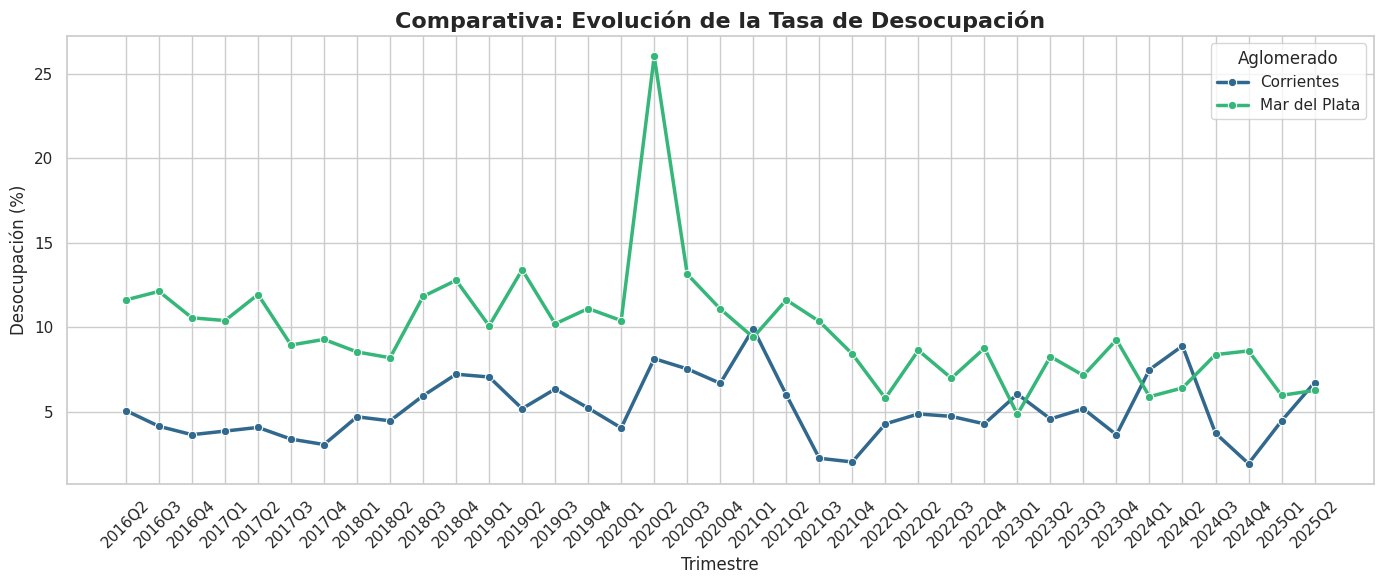

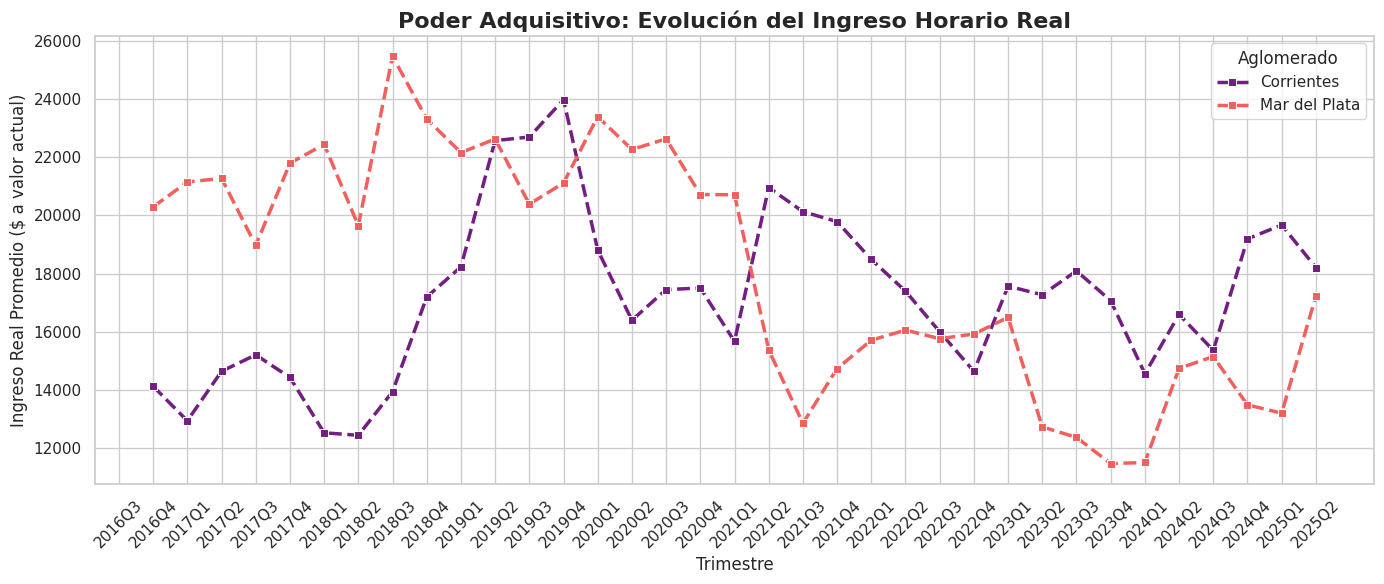

In [15]:
# --- BLOQUE 6: GRÁFICOS DE EVOLUCIÓN ---

def generar_graficos_comparativos(df_tasas_in, df_ingresos_in):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Configuración estética
    sns.set_theme(style="whitegrid", context="notebook")

    # Diccionario para que en el gráfico salgan los nombres y no los códigos
    nombres_aglo = {34: 'Mar del Plata', 12: 'Corrientes'}

    # Mapeamos los nombres en el DataFrame de Tasas
    df_tasas_in = df_tasas_in.copy()
    df_tasas_in['Ciudad'] = df_tasas_in['aglomerado'].map(nombres_aglo)

    # --- GRÁFICO 1: EVOLUCIÓN DE LA DESOCUPACIÓN ---
    plt.figure(figsize=(14, 6))

    sns.lineplot(
        data=df_tasas_in,
        x='periodo',
        y='tasa_desocupacion',
        hue='Ciudad',
        marker='o',
        palette='viridis', # Paleta de colores profesional
        linewidth=2.5
    )

    plt.title('Comparativa: Evolución de la Tasa de Desocupación', fontsize=16, fontweight='bold')
    plt.ylabel('Desocupación (%)')
    plt.xlabel('Trimestre')
    plt.xticks(rotation=45) # Rotamos las fechas para que se lean bien
    plt.legend(title='Aglomerado')
    plt.tight_layout()
    plt.show()

    # --- GRÁFICO 2: EVOLUCIÓN DEL INGRESO REAL ---
    # Primero calculamos el promedio de ingreso real por periodo y ciudad
    ingresos_agg = df_ingresos_in.groupby(['periodo', 'aglomerado'])['ingreso_horario_real'].mean().reset_index()
    ingresos_agg['Ciudad'] = ingresos_agg['aglomerado'].map(nombres_aglo)

    # Ordenamos para el gráfico
    ingresos_agg['anio'] = ingresos_agg['periodo'].str[:4]
    ingresos_agg['q'] = ingresos_agg['periodo'].str[-1]
    ingresos_agg = ingresos_agg.sort_values(['anio', 'q'])

    plt.figure(figsize=(14, 6))
    sns.lineplot(
        data=ingresos_agg,
        x='periodo',
        y='ingreso_horario_real',
        hue='Ciudad',
        marker='s',
        palette='magma',
        linestyle='--',
        linewidth=2.5
    )

    plt.title('Poder Adquisitivo: Evolución del Ingreso Horario Real', fontsize=16, fontweight='bold')
    plt.ylabel('Ingreso Real Promedio ($ a valor actual)')
    plt.xlabel('Trimestre')
    plt.xticks(rotation=45)
    plt.legend(title='Aglomerado')
    plt.tight_layout()
    plt.show()

# Ejecutamos los gráficos
if 'df_tasas' in globals() and 'df_trabajo' in globals():
    generar_graficos_comparativos(df_tasas, df_trabajo)

# **BLOQUE 7: ANÁLISIS MULTIVARIADO (EDUCACIÓN Y GÉNERO)**

In [16]:
# --- BLOQUE 7: ANÁLISIS MULTIVARIADO (EDUCACIÓN Y GÉNERO) ---

def analisis_brechas_ingreso(df_completo):
    print("🧠 Procesando datos para análisis multivariado...")

    df_multi = df_completo.copy()

    # 1. Mapeo de Género (CH04: 1=Varón, 2=Mujer)
    df_multi['genero_desc'] = df_multi['ch04'].map({1: 'Varón', 2: 'Mujer'})

    # 2. Agrupación de Nivel Educativo (NIVED)
    # 1-3: Nivel Bajo (Hasta primaria completa)
    # 4-5: Nivel Medio (Secundaria)
    # 6-7: Nivel Alto (Terciario/Universitario)
    def clasificar_educacion(nived):
        if nived in [1, 2, 3]: return '1. Bajo (Hasta Primaria)'
        elif nived in [4, 5]: return '2. Medio (Secundaria)'
        elif nived in [6, 7]: return '3. Alto (Superior)'
        else: return 'Ns/Nr'

    df_multi['nivel_educativo_agrupado'] = df_multi['nived'].apply(clasificar_educacion)

    # Filtramos registros sin datos válidos
    df_multi = df_multi[df_multi['nivel_educativo_agrupado'] != 'Ns/Nr']
    df_multi = df_multi[df_multi['ingreso_horario_real'] > 0] # Solo gente con ingresos

    # 3. Cálculo de Promedios
    # Agrupamos por Aglomerado, Género y Nivel Educativo
    tabla_brechas = df_multi.groupby(['aglomerado', 'genero_desc', 'nivel_educativo_agrupado'])['ingreso_horario_real'].mean().reset_index()

    # Mapeamos nombres de aglomerados
    nombres_aglo = {34: 'Mar del Plata', 12: 'Corrientes'}
    tabla_brechas['Ciudad'] = tabla_brechas['aglomerado'].map(nombres_aglo)

    print("✅ Tabla multivariada generada. Primeras filas:")
    display(tabla_brechas.head())

    # --- GRÁFICOS ---
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))

    # Gráfico de Barras: Ingreso por Nivel Educativo y Ciudad
    sns.barplot(
        data=tabla_brechas,
        x='nivel_educativo_agrupado',
        y='ingreso_horario_real',
        hue='Ciudad',
        palette='rocket'
    )

    plt.title('Impacto de la Educación en el Ingreso Real (Promedio)', fontsize=15, fontweight='bold')
    plt.ylabel('Ingreso Horario Real ($ Actuales)')
    plt.xlabel('Nivel Educativo')
    plt.legend(title='Aglomerado')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Gráfico 2: Brecha de Género (Varón vs Mujer) por Ciudad
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=tabla_brechas,
        x='Ciudad',
        y='ingreso_horario_real',
        hue='genero_desc',
        palette='Set2'
    )
    plt.title('Brecha de Ingresos: Varones vs. Mujeres', fontsize=15, fontweight='bold')
    plt.ylabel('Ingreso Horario Real ($)')
    plt.xlabel('Ciudad')
    plt.legend(title='Género')
    plt.show()

# Ejecutamos
if 'df_trabajo' in globals():
    analisis_brechas_ingreso(df_trabajo)
else:
    print("⚠️ Faltan datos del Bloque 4.")

🧠 Procesando datos para análisis multivariado...


KeyError: 'nived'